In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics

In [2]:
df = pd.read_csv("seeds.csv")

In [3]:
df.shape

(210, 8)

In [4]:
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [5]:
df2 = df.drop("target", axis = 1)

In [7]:
from sklearn.cluster import KMeans

km = KMeans()

wcss = []

for k in range(1,10):
    km = KMeans(n_clusters = k)
    km.fit(df2)
    wcss.append(km.inertia_)

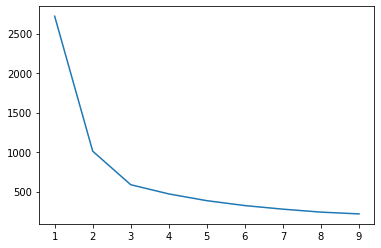

In [8]:
plt.plot(range(1,10), wcss)
plt.show()

In [9]:
km = KMeans(n_clusters = 3)

km.fit(df2)

KMeans(n_clusters=3)

In [10]:
centers = km.cluster_centers_
centers

array([[18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944],
       [11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948]])

In [11]:
df["pred_labels"] = km.labels_

In [13]:
df.tail()

,A,P,C,LK,WK,A_Coef,LKG,target,pred_labels
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2,2
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,2,2


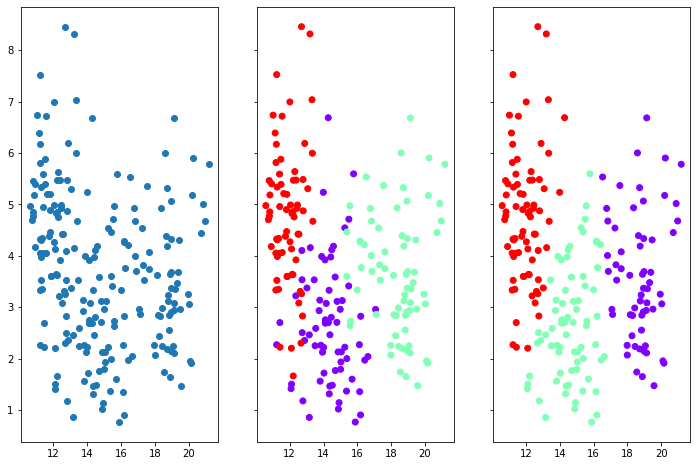

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (12,8))

ax1.scatter(x = df["A"], y = df["A_Coef"])

ax2.scatter(x = df["A"], y = df["A_Coef"], c = df["target"], cmap = "rainbow")

ax3.scatter(x = df["A"], y = df["A_Coef"], c = df["pred_labels"], cmap = "rainbow")